In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### Cluster Running Workouts

In [2]:
df = pd.read_parquet('./output_files/flatfiles/runningFactsFlat.parquet.gzip', engine='pyarrow')
df.shape

(102, 127)

In [3]:
df = df.dropna()
df.shape

(83, 127)

In [4]:
df = df[df['Date'] >= '2023-01-01']
df.shape

(70, 127)

In [5]:
#pd.set_option('display.max_columns', None)
# select Features
features = ['duration',
            # 'duration_sec',
            'SUM_DistanceWalkingRunning',
            'AVG_RunningSpeed',
            'SD_RunningSpeed',
            # 'ele_std',
            'course_mean',
            'course_std',
            # 'speed_mean',
            # 'speed_std',
            # 'speed_p10',
            # 'speed_p20',
            # 'speed_p30',
            # 'speed_p40',
            # 'speed_p50',
            # 'speed_p60',
            # 'speed_p70',
            # 'speed_p80',
            # 'speed_p90',
            # 'hAcc_mean',
            # 'hAcc_std',
            # 'vAcc_mean',
            # 'vAcc_std',
            'HeartRate_mean',
            'HeartRate_std',
            # 'HeartRate_min',
            # 'HeartRate_p10',
            # 'HeartRate_p20',
            # 'HeartRate_p30',
            # 'HeartRate_p40',
            # 'HeartRate_p50',
            # 'HeartRate_p60',
            # 'HeartRate_p70',
            # 'HeartRate_p80',
            # 'HeartRate_p90',
            # 'HeartRate_max',
            # 'HR_90-100',
            # 'HR_100-110',
            # 'HR_110-120',
            # 'HR_120-125',
            # 'HR_125-130',
            # 'HR_130-135',
            # 'HR_135-140',
            # 'HR_140-145',
            # 'HR_145-150',
            # 'HR_150-155',
            # 'HR_155-160',
            # 'HR_160-165',
            # 'HR_165-170',
            # 'HR_170-175',
            # 'HR_175-180',
            # 'HR_180-185',
            # 'HR_185-190',
            # 'HR_190-195',
            # 'HR_195-200',
            # 'HR_200-250',
            'shareHR_90-100',
            'shareHR_100-110',
            'shareHR_110-120',
            'shareHR_120-125',
            'shareHR_125-130',
            'shareHR_130-135',
            'shareHR_135-140',
            'shareHR_140-145',
            'shareHR_145-150',
            'shareHR_150-155',
            'shareHR_155-160',
            'shareHR_160-165',
            'shareHR_165-170',
            'shareHR_170-175',
            'shareHR_175-180',
            'shareHR_180-185',
            'shareHR_185-190',
            'shareHR_190-195',
            'shareHR_195-200',
            'shareHR_200-250']

In [6]:
df_features = df[features]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_features)

In [7]:
kmeans = KMeans(
    init="random",
    n_clusters=10,
    n_init=10,
    max_iter=300,
    random_state=42
    )

kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=10, n_init=10, random_state=42)

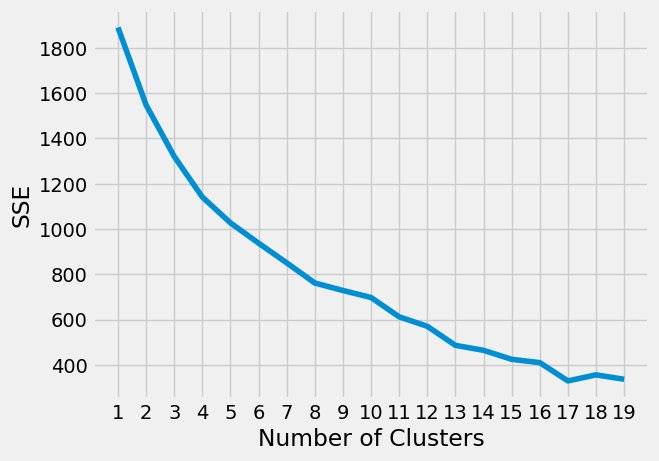

In [8]:
kmeans_kwargs = {
   "init": "random",
   "n_init": 100,
   "max_iter": 3000,
   "random_state": 42
   }

max_cluster = 20
# A list holds the SSE values for each k
sse = []
for k in range(1, max_cluster):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, max_cluster), sse)
plt.xticks(range(1, max_cluster))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

### Fit the model with desired number of clusters

In [9]:
kmeans = KMeans(
    init="random",
    n_clusters=4,
    n_init=10,
    max_iter=300,
    random_state=42
    )

kmeans.fit(scaled_features)

df_features['label'] = kmeans.fit_predict(scaled_features)

C:\Users\LHAGELS\AppData\Local\Temp\ipykernel_24288\4078267048.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features['label'] = kmeans.fit_predict(scaled_features)


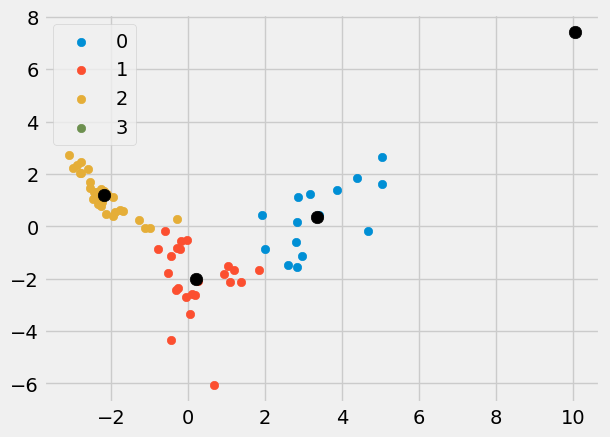

In [10]:
from sklearn.decomposition import PCA
pca = PCA(2)
 
#Transform the data
df_pca = pca.fit_transform(scaled_features)

#predict the labels of clusters.
label = kmeans.fit_predict(df_pca)

#Getting unique labels
u_labels = np.unique(label)
centroids = kmeans.cluster_centers_

#plotting the results:
for i in u_labels:
    plt.scatter(df_pca[label == i , 0] , df_pca[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [11]:
pd.set_option('display.max_columns', None)
df_features = df_features.apply(pd.to_numeric)

df_mean = df_features.groupby('label').mean()
df_count = df_features.groupby('label').size().reset_index(name='counts')

df_count.merge(df_mean, on = 'label', how = 'inner')

,label,counts,duration,SUM_DistanceWalkingRunning,AVG_RunningSpeed,SD_RunningSpeed,course_mean,course_std,HeartRate_mean,HeartRate_std,shareHR_90-100,shareHR_100-110,shareHR_110-120,shareHR_120-125,shareHR_125-130,shareHR_130-135,shareHR_135-140,shareHR_140-145,shareHR_145-150,shareHR_150-155,shareHR_155-160,shareHR_160-165,shareHR_165-170,shareHR_170-175,shareHR_175-180,shareHR_180-185,shareHR_185-190,shareHR_190-195,shareHR_195-200,shareHR_200-250
0,0,13,26.708118,4.295173,9.505371,0.818232,180.560100,96.209472,152.853893,10.932659,0.000740,0.007184,0.019806,0.003754,0.007167,0.008544,0.164838,0.041405,0.287301,0.149169,0.140271,0.083770,0.042761,0.006030,0.000000,0.036388,0.000000,0.000000,0.000000,0.0
1,1,11,84.451535,14.599449,8.403472,0.846209,178.794358,93.771484,140.598244,8.033904,0.002509,0.006595,0.010697,0.016031,0.061686,0.054076,0.275545,0.383074,0.148242,0.026914,0.005483,0.003944,0.001056,0.000913,0.001217,0.000000,0.000000,0.000000,0.000000,0.0
2,2,9,27.897355,4.426171,9.607421,2.313726,172.792977,98.767206,149.256879,19.853807,0.005698,0.026053,0.094394,0.040036,0.028964,0.049732,0.074231,0.078932,0.086795,0.084073,0.089038,0.074583,0.098924,0.091236,0.049333,0.010577,0.007054,0.003429,0.000449,0.0
3,3,37,32.558090,4.249850,7.938632,0.590562,177.139433,97.177036,127.016770,8.186969,0.012973,0.039520,0.161887,0.252774,0.248278,0.124161,0.079328,0.048582,0.020330,0.008682,0.001520,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [12]:
df['label'] = kmeans.fit_predict(scaled_features)

In [13]:
DimClusterRunning = df[['workout_pk', 'workoutActivityType', 'label']]
DimClusterRunning.to_parquet('./output_files/frontend_files/DimClusterRunning.parquet.gzip', compression='gzip')